   PassengerId  Pclass                                             Name  Sex  \
0            1       3                            Braund Mr Owen Harris    0   
1            2       1  Cumings Mrs John Bradley Florence Briggs Thayer    1   
2            3       3                             Heikkinen Miss Laina    1   
3            4       1         Futrelle Mrs Jacques Heath Lily May Peel    1   
4            5       3                           Allen Mr William Henry    0   

    Age  SibSp  Parch            Ticket     Fare Cabin Embarked Ticket_number  \
0  22.0      1      0         A/5 21171   7.2500   NaN        S         21171   
1  38.0      1      0          PC 17599  71.2833   C85        C         17599   
2  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S       3101282   
3  35.0      1      0            113803  53.1000  C123        S        113803   
4  35.0      0      0            373450   8.0500   NaN        S        373450   

  Ticket_item  
0         A/5  


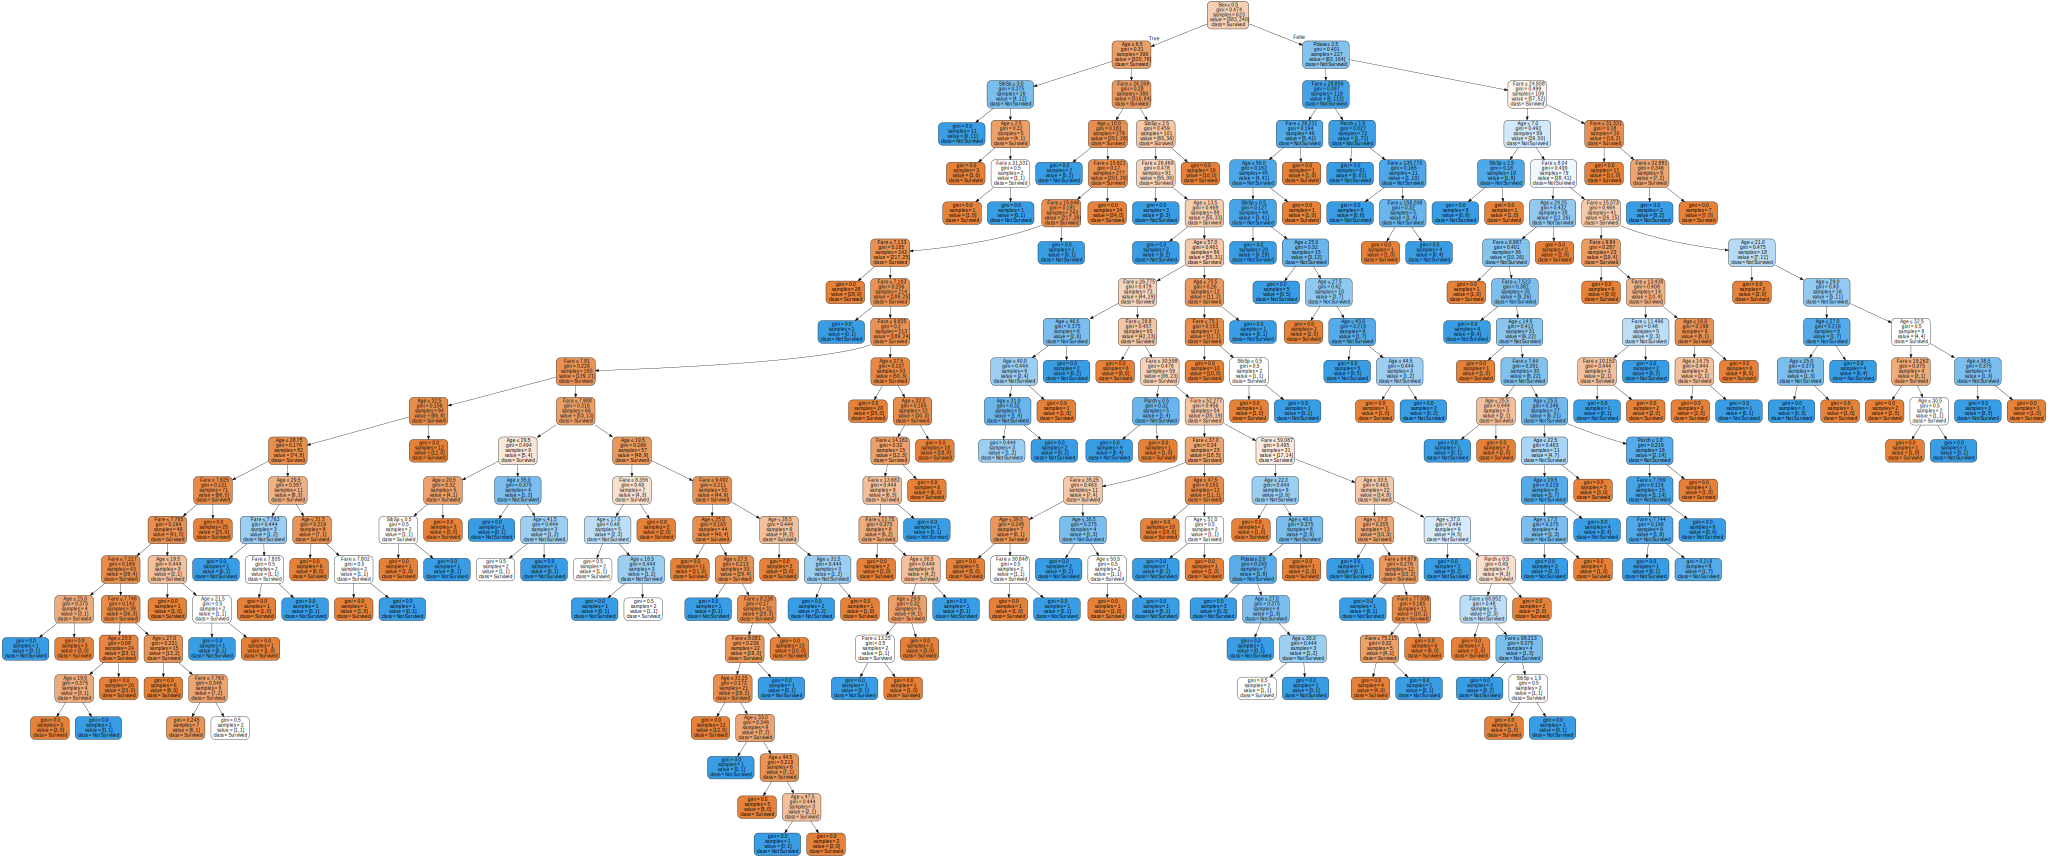

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
train_df.head()

def preprocess(df):
    df = df.copy()
    def normalize_name(x):
        return " ".join([v.strip(".,""()[]'/'") for v in x.split(" ")])
    def ticket_number(x):
        return x.split(" ")[-1]
    def ticket_item(x):
        items = x.split(" ")
        if len(items) == 1:
            return "None"
        return " ".join(items[0:-1])
    df["Name"] = df["Name"].apply(normalize_name)
    df["Ticket_number"] = df["Ticket"].apply(ticket_number)
    df["Ticket_item"] = df["Ticket"].apply(ticket_item)
    df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
    return df

preprocessed_train_df = preprocess(train_df)
preprocessed_train_df.head()

preprocessed_train_dt = preprocessed_train_df.drop(["Survived"], axis = 1)

print(preprocessed_train_dt.head())

survived_df = preprocessed_train_df["Survived"]
data = preprocessed_train_dt[["Age", "Sex", "Fare", "SibSp", "Parch", "Pclass"]]


data.loc[: ,"Age"] = data["Age"].fillna(data["Age"].median())
data.info()

X_train, X_test, y_train, y_test = train_test_split(
    data, survived_df, test_size = 0.3, random_state = 1234
)

X = X_train.values
test = X_test.values
y = y_train.values

clf = tree.DecisionTreeClassifier()
clf.fit(X,y)

import graphviz
from PIL import Image

dot_data = tree.export_graphviz(clf, out_file = None,
                               feature_names = X_train.columns.values,
                               class_names = ["Survived", "Not Survived"],
                               filled = True, rounded = True, special_characters = True)

graph = graphviz.Source(dot_data)
graph.view()


Y_pred = clf.predict(test)
y_test["Survived"] = Y_pred
print(clf.score(X,y))

graph